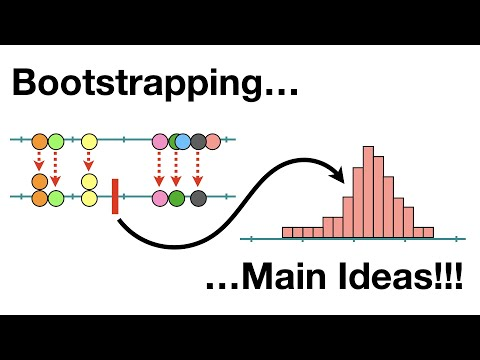

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. standard deviation is the deviation or variance of each data to the mean of the data set. While standard error of the mean is the close the sample mean represents the population. 

ChatBot Summary:
We discussed the difference between the standard deviation and the standard error of the mean (SEM). The standard deviation represents the variability or spread of individual data points in the original data, while the SEM indicates how precisely the sample mean estimates the true population mean. In essence, the standard deviation measures variability within the data, and SEM measures the precision of the sample mean.

ChatGPT Link:https://chatgpt.com/share/66fcc772-d834-8011-8691-982d457fb203

2. First step is to calculate standard error of the mean(SEM) by dividing standard deviation of the sample by the root of sample size. Next we would have to determine Critical value for the 95% confidence interval which falls within 1.96 standard errors of the mean. Lastly we can now construct the confidence interval by multiplying the standard error of the mean by the critical value(1.96) to get the margin of error. Confidence interval would be between sample mean - the above calcultaed value and sample mean + the above calculated value.

Chatbot Summary: In this session, we explored how to use the *standard error of the mean* (SEM) to create a 95% confidence interval. We started by defining the SEM, which measures the variability of the sample mean. The SEM is calculated by dividing the sample’s standard deviation by the square root of the sample size. For a 95% confidence level, we use a critical value of 1.96, which reflects how much of a normal distribution lies within 1.96 standard errors from the mean. 

To construct a 95% confidence interval, we multiply the SEM by 1.96 to get the margin of error. Adding and subtracting this margin from the sample mean gives us the confidence interval. This interval will cover 95% of the bootstrapped sample means, reflecting the range where we expect most sample means to lie based on the variability captured by the SEM.

ChatGPT Link: https://chatgpt.com/share/66fcc772-d834-8011-8691-982d457fb203

3. We could use bootstrapping to do so. We would first have to resample oue data multiple times and create a distribution for all the bootstrapped means. Next sort the means by lowest to highest. Lastly values between the 2.5th percentile and 97.5th percentile is the 95% confidence interval.

Chatbot Summary: In this discussion, we explained how to create a 95% bootstrapped confidence interval for the sample mean by generating multiple resamples from the original dataset and calculating their means. The confidence interval is determined by the 2.5th and 97.5th percentiles of the sorted bootstrapped means, capturing 95% of the means.

ChatGPT Link: https://chatgpt.com/share/66fcc772-d834-8011-8691-982d457fb203

In [1]:
import numpy as np
import pandas as pd

# Load dataset
url = 'https://gist.githubusercontent.com/bootshine2/ba15d3cb38e2ed31129aeca403405a12/raw/10949901cd8a6a75aa46c86b804c42ff410f929e/Bee%2520Colony%2520Loss.csv'
data = pd.read_csv(url)

# Clean column names and remove '%' from 'Total Annual Loss' column
data.columns = data.columns.str.strip()
data['Total Annual Loss'] = data['Total Annual Loss'].str.rstrip('%').astype('float') / 100

# Function to calculate bootstrap confidence interval
def bootstrap_ci(data, num_bootstrap=1000, ci=95, stat_func=np.mean):
    """ 
    Calculate the bootstrap confidence interval for a population statistic.
    
    Parameters:
    - data: The data sample (array or list).
    - num_bootstrap: Number of bootstrap samples to generate.
    - ci: The confidence interval (default is 95%).
    - stat_func: The statistic function to apply (default is np.mean).
    
    Returns:
    - Lower and upper bounds of the confidence interval.
    """
    
    # Generate bootstrap samples and calculate the statistic for each sample
    bootstrap_samples = [stat_func(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_bootstrap)]
    
    # Calculate the confidence interval bounds
    lower_bound = np.percentile(bootstrap_samples, (100-ci)/2)
    upper_bound = np.percentile(bootstrap_samples, 100 - (100-ci)/2)
    
    return lower_bound, upper_bound

# Extract 'Total Annual Loss' column values
loss_data = data['Total Annual Loss'].dropna().values

# Get 95% confidence interval for the mean
mean_ci = bootstrap_ci(loss_data)
print(f"95% CI for the mean: {mean_ci}")

# Example: Get 95% confidence interval for the median by changing stat_func to np.median
median_ci = bootstrap_ci(loss_data, stat_func=np.median)
print(f"95% CI for the median: {median_ci}")

95% CI for the mean: (0.39643674785100297, 0.4264120343839542)
95% CI for the median: (0.379975, 0.414)


ChatBot Summary: In this chat, we calculated a 95% bootstrap confidence interval for the population mean using bee colony loss data. After cleaning the dataset, we created a bootstrap_ci function that generates resampled datasets and computes confidence intervals for any statistic, such as the mean or median. We applied this function to calculate a 95% CI for both the mean and the median. The function is flexible, allowing changes in the statistic type, number of bootstrap samples, and confidence level.

ChatGPT Link: https://chatgpt.com/share/66ff37fc-467c-8009-bcde-707929cfb690

5. population parameter is the exact we want to estimate and this is at most times not known. Sample statistics is the estimate we get from our sample data and it's an approximation based on that sample. Confidence intervals gives a range in which the population parameter would fall into on our estimated sample statistics. 

ChatBot Summary: We distinguish between the population parameter and the sample statistic because the population parameter is the true value we're trying to estimate, while the sample statistic is an estimate based on the data we collect. A confidence interval provides a range around the sample statistic, reflecting uncertainty in the estimate, and indicates where the true population parameter is likely to fall.

ChatGPT Link: https://chatgpt.com/share/66ff37fc-467c-8009-bcde-707929cfb690

6. 
1. What is the process of bootstrapping? 
If we had a sample that we would like draw a conclusion that covers a whole population, we can take random samples for the 1 sample we have with replacement. These can then me analysed to undertand variablity and roughly conclude how the population should look like.

2. What is the main purpose of bootstrapping?
It gives us an idea of how reliable our data is. It is an excelent tool to use when you dont have a large sample. It also makes it easier to understand the variablity of the data and helps us come to more accurate conclusions.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
If you had a (hypothesized) guess of the average course grade for this term test but you only had results of n(20) people we could check if this (hypothized) guess is valid bu bootstrapping. Bootstrapping could help you get a more closer estimate on how the entire classs' average would be. You would first bootstrap you 20 data and resample with replacement. After doing this a 1000 times, take the average of each of those bootstrapped samples and come up with a distribution. Now you can check where you guess lands on the distribution. If your guess is in the middle of the plot, then your guess would be very close. Otherwise it would be less plausibe.  


7. 
1. Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero?
If the confidence interval overlaps zero, it means that the range might include values that are zero. In the instance of the sample included in the Pre-Lecture Video, if the confidence interval includes zero, that means that the sample might just have no effect and that we are not excluding or "rejecting the null hypothesis". Doesnt have to mean that the sample mean is zero. Could be that the sample mean might be close to zero.

2. What would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? 
This is when the zero is not included in the confidence interval. Therefore, the sample mean must be above zero or below.

ChatBot Summary: 
Overlapping with Zero: If a confidence interval includes zero, we “fail to reject the null hypothesis,” meaning there’s insufficient evidence to conclude a significant effect.
Not Overlapping with Zero: If it doesn’t include zero, we can “reject the null hypothesis,” indicating a statistically significant effect.

In summary, the inclusion of zero in the confidence interval determines whether we reject or fail to reject the null hypothesis.

ChatGPT Link: https://chatgpt.com/share/66ff42be-b7ac-8009-b833-556a0701015c

8. A null hypothesis in this context would suggest that there is no effect on patents taking this vaccine. Or that there is no significant difference between the Initail Health Scores and Final. 

In [2]:
import pandas as pd

# Creating the data for the CSV file
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
csv_file_path = 'AliTech_Vaccine_Data.csv'
df.to_csv(csv_file_path, index=False)

print(f"CSV file created at: {csv_file_path}")

CSV file created at: AliTech_Vaccine_Data.csv


In [3]:
df.describe()


,PatientID,Age,InitialHealthScore,FinalHealthScore
count,10.00000,10.00000,10.000000,10.000000
mean,5.50000,38.40000,81.000000,84.300000
std,3.02765,8.30261,2.828427,2.110819
min,1.00000,26.00000,76.000000,80.000000
25%,3.25000,33.25000,79.250000,83.250000
50%,5.50000,38.00000,81.000000,85.000000
75%,7.75000,44.00000,83.000000,86.000000
max,10.00000,52.00000,85.000000,86.000000


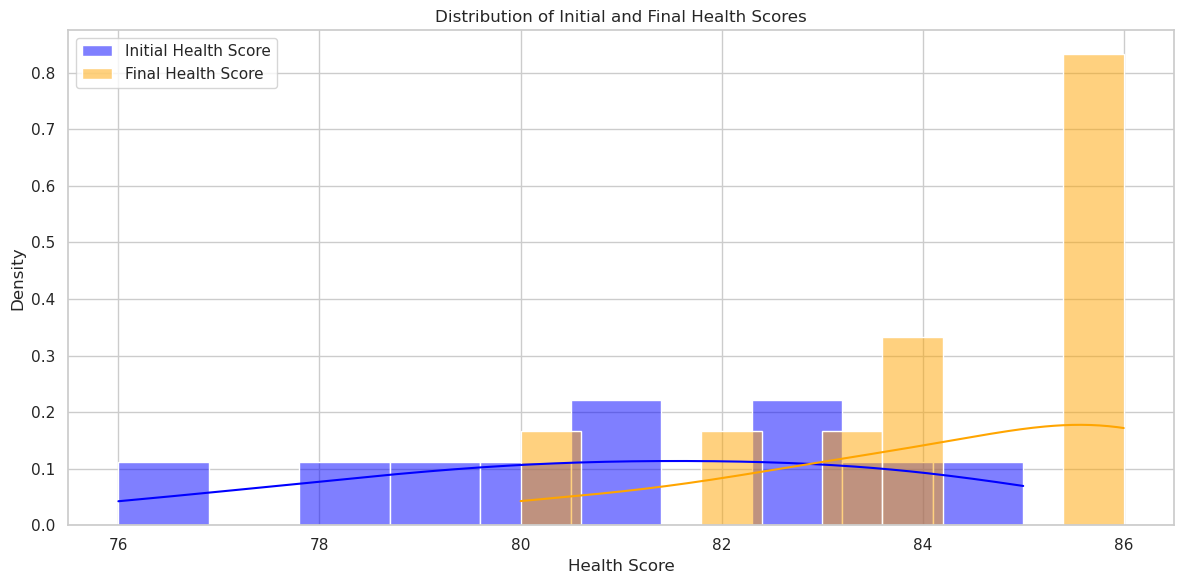

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('AliTech_Vaccine_Data.csv')

# Setting the plot style
sns.set(style="whitegrid")

# Creating a histogram for Initial and Final Health Scores
plt.figure(figsize=(12, 6))

# Plotting the histogram for Initial Health Scores
sns.histplot(df['InitialHealthScore'], bins=10, color='blue', label='Initial Health Score', kde=True, stat="density", alpha=0.5)

# Plotting the histogram for Final Health Scores
sns.histplot(df['FinalHealthScore'], bins=10, color='orange', label='Final Health Score', kde=True, stat="density", alpha=0.5)

# Adding title and labels
plt.title("Distribution of Initial and Final Health Scores")
plt.xlabel("Health Score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()

plt.savefig('health_score_distribution.png', dpi=300)

# Show the plot
plt.show()  # Remove the renderer argument

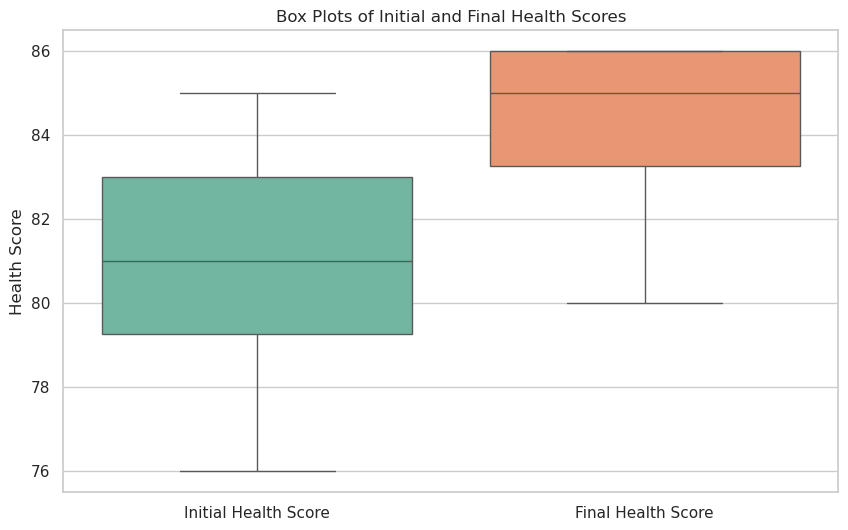

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv('AliTech_Vaccine_Data.csv')

# Setting the plot style
sns.set(style="whitegrid")

# Creating a figure for the box plots
plt.figure(figsize=(10, 6))

# Creating box plots for Initial and Final Health Scores
sns.boxplot(data=df[['InitialHealthScore', 'FinalHealthScore']], palette="Set2")

# Adding title and labels
plt.title("Box Plots of Initial and Final Health Scores")
plt.ylabel("Health Score")
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])  # Customizing x-axis labels

# Save the plot as a PNG file
plt.savefig('health_score_boxplots.png', dpi=300)

# Show the plot
plt.show()

Bootstrap results for Initial Health Score:
Mean: 80.96, 95% CI: (79.2, 82.6)
Bootstrap results for Final Health Score:
Mean: 84.29, 95% CI: (83.0, 85.4)


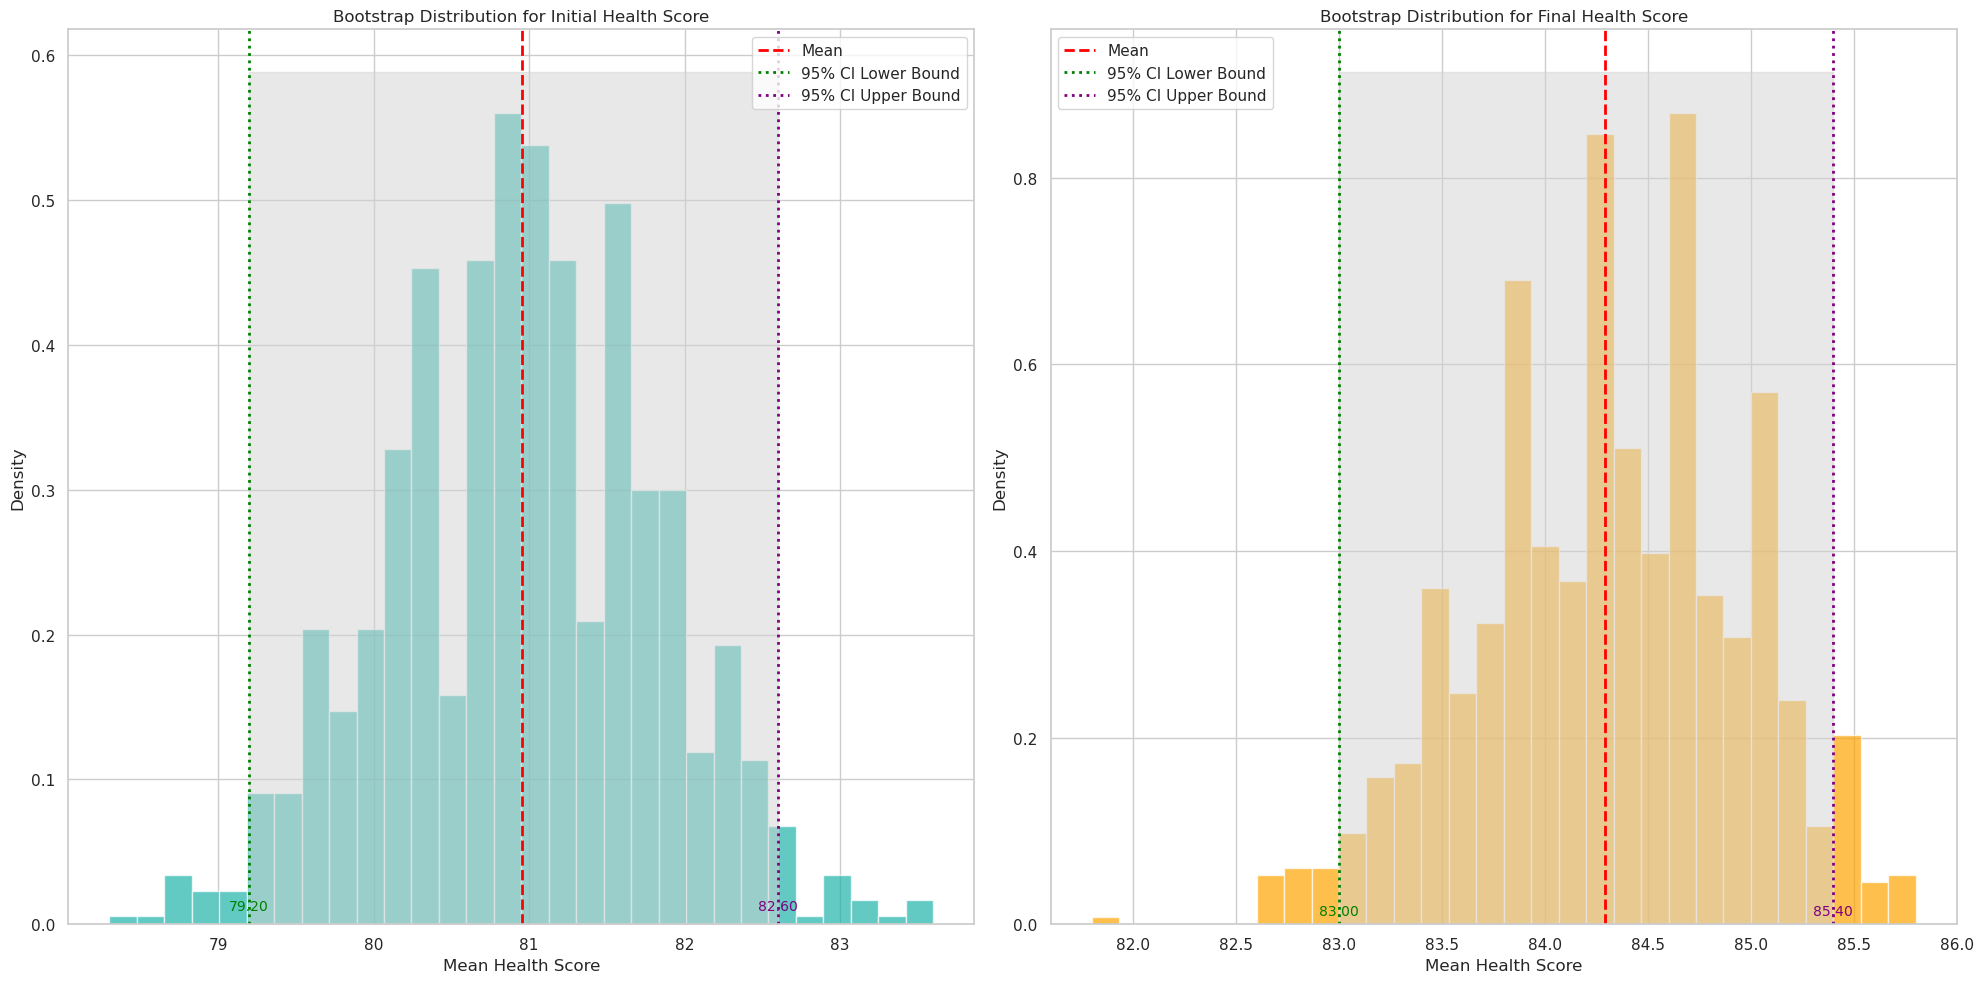

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('AliTech_Vaccine_Data.csv')

# Function to perform bootstrapping
def bootstrap(data, num_samples, statistic, alpha):
    """Perform bootstrap resampling on the dataset."""
    bootstrapped_stats = []
    
    for _ in range(num_samples):
        # Generate a bootstrap sample
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_stats.append(statistic(sample))

    # Calculate the confidence intervals
    lower_bound = np.percentile(bootstrapped_stats, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrapped_stats, 100 * (1 - alpha / 2))
    
    return bootstrapped_stats, (lower_bound, upper_bound)

# Parameters for bootstrapping
num_samples = 1000  # Number of bootstrap samples
alpha = 0.05        # Significance level for 95% CI

# Bootstrapping for Initial Health Score
initial_bootstrap, initial_ci = bootstrap(df['InitialHealthScore'], num_samples, np.mean, alpha)
print("Bootstrap results for Initial Health Score:")
print(f"Mean: {np.mean(initial_bootstrap):.2f}, 95% CI: {initial_ci}")

# Bootstrapping for Final Health Score
final_bootstrap, final_ci = bootstrap(df['FinalHealthScore'], num_samples, np.mean, alpha)
print("Bootstrap results for Final Health Score:")
print(f"Mean: {np.mean(final_bootstrap):.2f}, 95% CI: {final_ci}")

# Plotting the bootstrap distributions
plt.figure(figsize=(20, 10))

# Initial Health Score
plt.subplot(1, 2, 1)
plt.hist(initial_bootstrap, bins=30, color='lightseagreen', alpha=0.7, density=True)
plt.axvline(np.mean(initial_bootstrap), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(initial_ci[0], color='green', linestyle='dotted', linewidth=2, label='95% CI Lower Bound')
plt.axvline(initial_ci[1], color='purple', linestyle='dotted', linewidth=2, label='95% CI Upper Bound')

# Shading the confidence interval
plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=initial_ci[0], x2=initial_ci[1], color='lightgray', alpha=0.5)

# Annotating the confidence interval
plt.text(initial_ci[0], 0.01, f'{initial_ci[0]:.2f}', color='green', fontsize=10, ha='center')
plt.text(initial_ci[1], 0.01, f'{initial_ci[1]:.2f}', color='purple', fontsize=10, ha='center')

plt.title('Bootstrap Distribution for Initial Health Score')
plt.xlabel('Mean Health Score')
plt.ylabel('Density')
plt.legend()

# Final Health Score
plt.subplot(1, 2, 2)
plt.hist(final_bootstrap, bins=30, color='orange', alpha=0.7, density=True)
plt.axvline(np.mean(final_bootstrap), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(final_ci[0], color='green', linestyle='dotted', linewidth=2, label='95% CI Lower Bound')
plt.axvline(final_ci[1], color='purple', linestyle='dotted', linewidth=2, label='95% CI Upper Bound')

# Shading the confidence interval
plt.fill_betweenx(y=[0, plt.ylim()[1]], x1=final_ci[0], x2=final_ci[1], color='lightgray', alpha=0.5)

# Annotating the confidence interval
plt.text(final_ci[0], 0.01, f'{final_ci[0]:.2f}', color='green', fontsize=10, ha='center')
plt.text(final_ci[1], 0.01, f'{final_ci[1]:.2f}', color='purple', fontsize=10, ha='center')

plt.title('Bootstrap Distribution for Final Health Score')
plt.xlabel('Mean Health Score')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('bootstrap_distribution_analysis.png')
plt.show()

A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.

The analysis done indicated that there is significantly positive effect of health scores. The mean final health is greater than the mean initial health in the bootstrapped data.This would mean that we are "rejecting the null hypothesis" as the confidence interval in the Final Health Score does not include any values from the confidence interval of the Initial Health Score. So we can confidently reject the null hypothesis. 

ChatBot Summary: 
Objective: Evaluate the effectiveness of AliTech’s vaccine on patient health scores.

Methodology:

	•	Descriptive Statistics: Analyzed means of initial and final health scores.
	•	Paired Sample t-Test: Tested the null hypothesis of no effect.
	•	Bootstrapping: Estimated confidence intervals for health score improvements.
	•	Visualizations: Used box plots and histograms to show score changes.

Findings:
If the t-test p-value is < 0.05 and confidence intervals do not overlap, we reject the null hypothesis, indicating that the vaccine significantly improves health scores.

ChatGPT Link: https://chatgpt.com/share/66ff4c32-0990-8009-b427-9ce343a30922

9. Yes i have used the course wiki-textbook. 